In [7]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

The aim is to construct a 1-D RT code by putting together the different elements that we developed in the previous practicals.

First we start by setting by a grid (of spherical shells around the source) with size N.

In [14]:
N = 100  # Number of grid cells
delta_r = 1.0  # Cell size
r = np.arange(0.5 * delta_r, N * delta_r, delta_r)  # Grid of spherical shells

l = np.cumsum(delta_r * np.ones(N))

#parameters
alpha_nu = 3.59e-7 / (365 * 24 * 3600)  # Adjusted for years
h_nu = 13.6
tau_nu = alpha_nu * l
delta_tau = tau_nu[1] - tau_nu[0]
n_e = 1e6
nu_th = 13.6  # eV
C = 1.0  # Clumping factor
n_H_mean = 1e-4  # mean density of the universe at redshift z = 9
N_ph_dot = 1e54  # ionizing photon production rate per sec

# Analytical expressions for Strömgren radius and recombination time
r_S = ((3 * N_ph_dot) / (4 * np.pi * alpha_nu * C * n_H_mean**2))**(1 / 3)
t_rec = 1 / (C * alpha_nu * n_H_mean)

V_shell_1 = np.cumsum(((4 / 3) * np.pi * ((r + 0.5 * delta_r)**3 - (r - 0.5 * delta_r)**3)) * np.ones(N))

Now for each grid cell calculating the photoionisation rate, the ionized fraction x from the given equation

In [16]:
# Function to calculate the ionized fraction
def photoionization_rate(tem_tau_nu, n_e, V_shell_temp, delta_tau):
    return np.exp(-tem_tau_nu) * (1 - np.exp(-delta_tau)) / (h_nu * n_e * np.sum(V_shell_temp))

photo_new = []  #appending the values here
for i in range(N):
    V_shell_temp = V_shell_1[i]
    tem_tau_nu = tau_nu[i]
    Gamma_numerical, _ = quad(photoionization_rate, nu_th, np.inf, args=(n_e, V_shell_temp, tem_tau_nu))
    photo_new.append(Gamma_numerical)

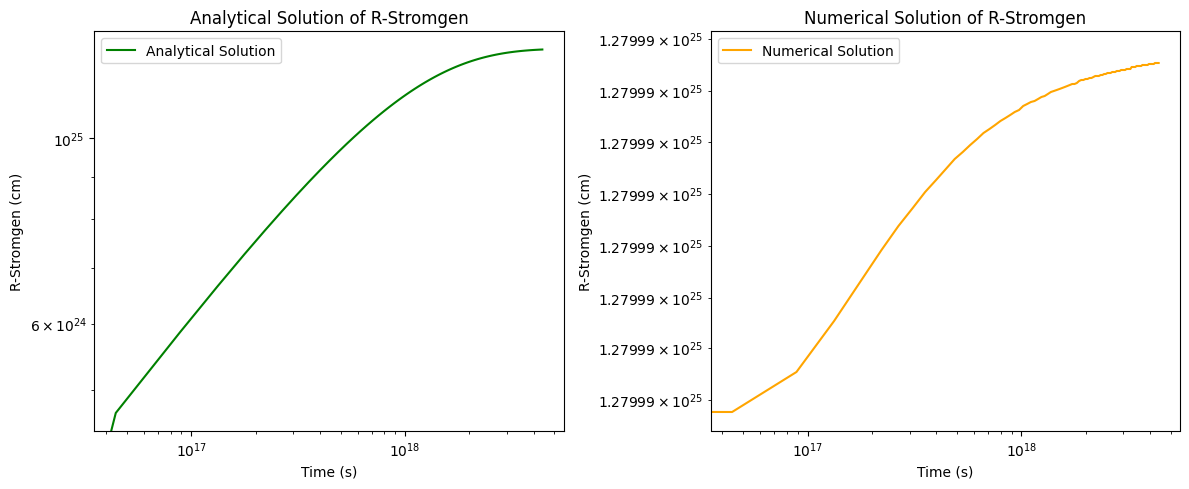

In [15]:
# Analytical solution
time = np.linspace(0, 5 * t_rec, N)
anal_r = r_S * (1 - np.exp(-time / t_rec))**(1 / 3)

# Numerical solution 
num_r = r_S * np.exp(-(photo_new * time))

# Plot results as subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Analytical Solution
ax1.plot(time, anal_r, label='Analytical Solution', color='g')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('R-Stromgen (cm)')
ax1.set_title('Analytical Solution of R-Stromgen')
ax1.legend()
ax1.set_xscale('log')
ax1.set_yscale('log')

# Numerical Solution
ax2.plot(time, num_r, label='Numerical Solution', color='orange')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('R-Stromgen (cm)')
ax2.set_title('Numerical Solution of R-Stromgen')
ax2.legend()
ax2.set_xscale('log')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()